In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

C:\Users\Acer\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


#### Read all files to pandas dataframes

In [2]:
df_movies = pd.read_table("dataSet/movies.dat",sep="\t")
pd.set_option('display.max_columns',None)

In [3]:
df_movies.rename(columns={'id': 'movieID'}, inplace=True)

In [4]:
df_movies.head(2)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,15,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...


In [5]:
df_movies.shape

(10197, 21)

In [6]:
df_genres = pd.read_table("dataSet/movie_genres.dat",sep="\t")

In [7]:
df_genres.head(2)

,movieID,genre
0,1,Adventure
1,1,Animation


In [8]:
df_directors = pd.read_table("dataSet/movie_directors.dat",sep="\t")

In [9]:
df_directors.head(2)

,movieID,directorID,directorName
0,1,john_lasseter,John Lasseter
1,2,joe_johnston,Joe Johnston


In [10]:
df_actors = pd.read_table("dataSet/movie_actors.dat",sep="\t")

In [11]:
df_actors.head(2)

,movieID,actorID,actorName,ranking
0,1,annie_potts,Annie Potts,10
1,1,bill_farmer,Bill Farmer,20


In [12]:
df_countries = pd.read_table("dataSet/movie_countries.dat",sep="\t")

In [13]:
df_countries.head(2)

,movieID,country
0,1,USA
1,2,USA


In [14]:
df_locations = pd.read_table("dataSet/movie_locations.dat",sep="\t")

In [15]:
df_locations.head(2)

,movieID,location1,location2,location3,location4
0,1,NaN,NaN,NaN,NaN
1,2,Canada,British Columbia,NaN,NaN


In [16]:
df_tags = pd.read_table("dataSet/tags.dat",sep="\t")

In [17]:
df_tags.rename(columns={'id': 'tagID'}, inplace=True)

In [18]:
df_tags.head(2)

,tagID,value
0,1,earth
1,2,police


In [19]:
df_user_tags = pd.read_table("dataSet/user_taggedmovies.dat",sep="\t")

In [20]:
df_user_tags.head(2)

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,353,5290,29,10,2006,23,20,15
1,78,4223,5264,16,4,2007,4,43,45


In [21]:
df_movie_tags = pd.read_table("dataSet/movie_tags.dat",sep="\t")

In [22]:
df_movie_tags.head(2)

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3


In [23]:
df_ratings = pd.read_table("dataSet/user_ratedmovies.dat",sep="\t")

In [24]:
df_ratings.head(2)

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44


#### Merge above dataframes together which are important for the task

In [25]:
#df1.merge(df2, left_on='lkey', right_on='rkey')
df = df_movies.merge(df_ratings, on='movieID')

In [26]:
df.head(2)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,175,4.0,4,12,2005,6,36,46


In [27]:
df.shape

(855598, 29)

In [28]:
df_genres

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
20804,65126,Comedy
20805,65126,Drama
20806,65130,Drama
20807,65130,Romance


#### we have to map genres list for each of movies

In [29]:
#df_genres[df_genres['movieID']==1].genre.unique()

In [30]:
def get_genres(x):
    genres_list = df_genres[df_genres['movieID']== x].genre.unique()
    return ' '.join(genres_list)

In [31]:
df['genres'] = df['movieID'].apply(lambda x: get_genres(x))

In [32]:
df.tail(2)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres
855596,65133,Blackadder Back & Forth,212579,Blackadder Back & Forth,http://ia.media-imdb.com/images/M/MV5BMjA5MjU4...,1999,blackadder-back-forth,0,0,0,0,0,0,0,0,0,0,0,0,0,http://content7.flixster.com/movie/34/10/69/34...,33384,3.0,4,1,2009,3,2,8,Comedy
855597,65133,Blackadder Back & Forth,212579,Blackadder Back & Forth,http://ia.media-imdb.com/images/M/MV5BMjA5MjU4...,1999,blackadder-back-forth,0,0,0,0,0,0,0,0,0,0,0,0,0,http://content7.flixster.com/movie/34/10/69/34...,68151,5.0,5,1,2009,5,29,53,Comedy


In [33]:
df['genres'][107700]

'Action Adventure Fantasy'

In [34]:
df = df.merge(df_directors, on='movieID',how='left')

In [35]:
df.head(2)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres,directorID,directorName
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,175,4.0,4,12,2005,6,36,46,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter


In [36]:
df.isnull().sum()

movieID                       0
title                         0
imdbID                        0
spanishTitle                  0
imdbPictureURL             1664
year                          0
rtID                      14178
rtAllCriticsRating            0
rtAllCriticsNumReviews        0
rtAllCriticsNumFresh          0
rtAllCriticsNumRotten         0
rtAllCriticsScore             0
rtTopCriticsRating            0
rtTopCriticsNumReviews        0
rtTopCriticsNumFresh          0
rtTopCriticsNumRotten         0
rtTopCriticsScore             0
rtAudienceRating              0
rtAudienceNumRatings          0
rtAudienceScore               0
rtPictureURL                  0
userID                        0
rating                        0
date_day                      0
date_month                    0
date_year                     0
date_hour                     0
date_minute                   0
date_second                   0
genres                        0
directorID                 2230
director

In [37]:
# we can see there are some movies which have not mentioned direcotors

In [38]:
def get_actors(x):
    actors_list = df_actors[df_actors['movieID']== x].actorName.unique()
    if len(actors_list) >= 4:
        return ' '.join(actors_list[:4]) 
    else:
        return ' '.join(actors_list)

In [39]:
df['actors'] = df['movieID'].apply(lambda x: get_actors(x))

In [40]:
df.head(1)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres,directorID,directorName,actors
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...


In [41]:
df['actors'][1288]

'Peter Bryant Adam Hann-Byrd Bebe Neuwirth Bonnie Hunt'

In [42]:
df_countries.head(2)

,movieID,country
0,1,USA
1,2,USA


In [43]:
df_countries['country'].unique()

array(['USA', 'UK', 'France', 'Australia', 'South Africa', 'Japan',
       'Canada', 'Italy', 'Germany', 'Iran', 'Netherlands', 'New Zealand',
       'Hong Kong', 'Croatia', 'Russia', 'Republic of Macedonia',
       'Ireland', 'Taiwan', 'Belgium', 'Mexico', 'China', 'Peru', 'Cuba',
       'Spain', 'Portugal', 'Austria', 'South Korea', 'Denmark',
       'Finland', 'Tunisia', 'Sweden', 'India', 'Brazil', 'Israel',
       'Argentina', 'Burkina Faso', 'Hungary', 'West Germany', 'Vietnam',
       nan, 'Norway', 'Czech Republic', 'Botswana', 'Aruba', 'Jamaica',
       'Poland', 'Greece', 'Federal Republic of Yugoslavia', 'Yugoslavia',
       'Switzerland', 'Bhutan', 'Soviet Union', 'Bosnia and Herzegovina',
       'Thailand', 'Czechoslovakia', 'Romania', 'Philippines', 'Libya',
       'Iceland', 'Bulgaria', 'Turkey', 'East Germany', 'Ivory Coast',
       'Afghanistan', 'Singapore', 'Colombia', 'Chile', 'Senegal',
       'Venezuela', 'Occupied Palestinian Territory', 'Algeria',
       'Kazakh

In [44]:
df = df.merge(df_countries, on='movieID')

In [45]:
df_locations.head(2)

,movieID,location1,location2,location3,location4
0,1,NaN,NaN,NaN,NaN
1,2,Canada,British Columbia,NaN,NaN


In [46]:
# it is not much important location when we have country details

In [47]:
df_tags.head(3)

,tagID,value
0,1,earth
1,2,police
2,3,boxing


In [48]:
df_tags['value'].unique()

array(['earth', 'police', 'boxing', ..., 'top 5 movie', 'vontatott',
       'tps'], dtype=object)

In [49]:
len(df_tags['value'].unique())

13222

In [50]:
df_user_tags.head(3)

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,353,5290,29,10,2006,23,20,15
1,78,4223,5264,16,4,2007,4,43,45
2,127,1343,1544,28,8,2007,3,42,27


In [51]:
df_new_tags = df_user_tags.merge(df_tags, on='tagID')

In [52]:
df_new_tags.head(2)

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,value
0,75,353,5290,29,10,2006,23,20,15,tissit
1,78,4223,5264,16,4,2007,4,43,45,want to own


In [53]:
df_movie_tags.head(2) # we do not need this for further analysis

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3


In [54]:
#df = df.merge(df_new_tags, on='movieID')

In [55]:
df.head(3)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres,directorID,directorName,actors,country
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,175,4.0,4,12,2005,6,36,46,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA
2,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,190,4.5,9,7,2003,21,19,58,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA


In [56]:
df.columns

Index(['movieID', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL', 'userID',
       'rating', 'date_day', 'date_month', 'date_year', 'date_hour',
       'date_minute', 'date_second', 'genres', 'directorID', 'directorName',
       'actors', 'country'],
      dtype='object')

In [57]:
# Merged all essential tables together

In [58]:
df.isnull().sum()

movieID                       0
title                         0
imdbID                        0
spanishTitle                  0
imdbPictureURL             1664
year                          0
rtID                      14178
rtAllCriticsRating            0
rtAllCriticsNumReviews        0
rtAllCriticsNumFresh          0
rtAllCriticsNumRotten         0
rtAllCriticsScore             0
rtTopCriticsRating            0
rtTopCriticsNumReviews        0
rtTopCriticsNumFresh          0
rtTopCriticsNumRotten         0
rtTopCriticsScore             0
rtAudienceRating              0
rtAudienceNumRatings          0
rtAudienceScore               0
rtPictureURL                  0
userID                        0
rating                        0
date_day                      0
date_month                    0
date_year                     0
date_hour                     0
date_minute                   0
date_second                   0
genres                        0
directorID                 2230
director

In [59]:
df.to_csv('merged_dataset.csv',index=False)

In [60]:
df_new = pd.read_csv('merged_dataset.csv')

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
df_new.isnull().sum()

movieID                       0
title                         0
imdbID                        0
spanishTitle                  0
imdbPictureURL             1664
year                          0
rtID                      14178
rtAllCriticsRating            0
rtAllCriticsNumReviews        0
rtAllCriticsNumFresh          0
rtAllCriticsNumRotten         0
rtAllCriticsScore             0
rtTopCriticsRating            0
rtTopCriticsNumReviews        0
rtTopCriticsNumFresh          0
rtTopCriticsNumRotten         0
rtTopCriticsScore             0
rtAudienceRating              0
rtAudienceNumRatings          0
rtAudienceScore               0
rtPictureURL                  0
userID                        0
rating                        0
date_day                      0
date_month                    0
date_year                     0
date_hour                     0
date_minute                   0
date_second                   0
genres                        0
directorID                 2230
director

In [62]:
# imdbPictureURL, rtID, directorID, directorName and country columns have null values


In [63]:
df_new.fillna('Unknown',inplace=True)

In [64]:
movie_ratingCount = (df_new.groupby(by = ['title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']])

In [65]:
df_new = df_new.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')

In [66]:
#df.drop_duplicates(subset ="title", keep = 'last', inplace = True)

In [67]:
df_new.head(3)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres,directorID,directorName,actors,country,totalRatingCount
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA,1263
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,175,4.0,4,12,2005,6,36,46,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA,1263
2,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,190,4.5,9,7,2003,21,19,58,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA,1263


In [68]:
df_new.columns

Index(['movieID', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL', 'userID',
       'rating', 'date_day', 'date_month', 'date_year', 'date_hour',
       'date_minute', 'date_second', 'genres', 'directorID', 'directorName',
       'actors', 'country', 'totalRatingCount'],
      dtype='object')

## EDA Phase

### Rating Feature

In [69]:
df_new['rating'].describe()

count    855598.000000
mean          3.437945
std           1.002561
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [70]:
# ratings vary from 0.5 to 5 with average 3.43 

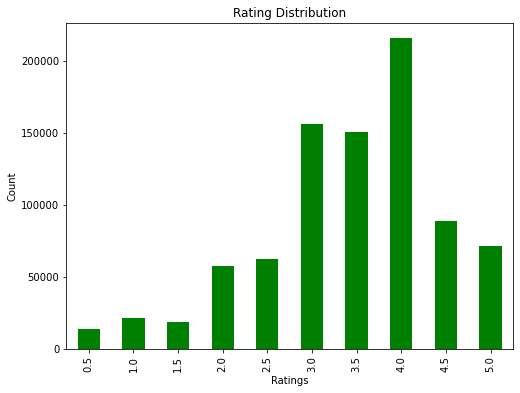

In [71]:
plt.figure(figsize=(8,6))
df_new['rating'].value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [72]:
# we can see most of movies has rated above 3
# we can assume most of movies are quality and most of users love for those

In [73]:
ratings_plot = pd.DataFrame()
# make two arrays for plot
ratings_plot['Average_Rating'] = df_new.groupby('title')['rating'].mean().values
ratings_plot['Number_Ratings'] = df_new.groupby('title')['rating'].count().values

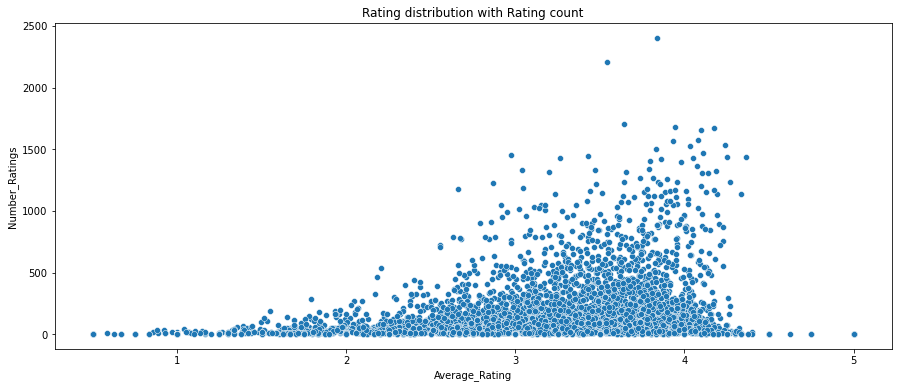

In [74]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = ratings_plot, x = 'Average_Rating', y = 'Number_Ratings')
plt.title('Rating distribution with Rating count')
plt.xlabel('Average_Rating')
plt.ylabel('Number_Ratings')
plt.show()

In [75]:
# we can see it has a positive correlation
# when increse the number of people wathcing a movie then it will have a high rating

### Genre Feature

In [76]:
genre_ids = set()
for s in df['genres'].str.split(' ').values:
    genre_ids = genre_ids.union(set(s))

In [77]:
len(genre_ids)

20

In [78]:
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [79]:
keyword_occurences, keyword_count = count_word(df_new, 'genres', genre_ids)
keyword_occurences

[['Drama', 67839],
 ['Comedy', 64070],
 ['Documentary', 9865],
 ['Thriller', 8137],
 ['Horror', 6728],
 ['Action', 1882],
 ['Western', 1454],
 ['Sci-Fi', 958],
 ['Romance', 867],
 ['Musical', 278],
 ['War', 259],
 ['Crime', 255],
 ['Adventure', 253],
 ['Film-Noir', 197],
 ['Animation', 44],
 ['Children', 44],
 ['Mystery', 32],
 ['Fantasy', 20],
 ['Short', 2],
 ['IMAX', 0]]

In [80]:
# we can see Drama is the most frequent genre (people love most) and after that comedy, Documentary, Thriller, Horror, Action...

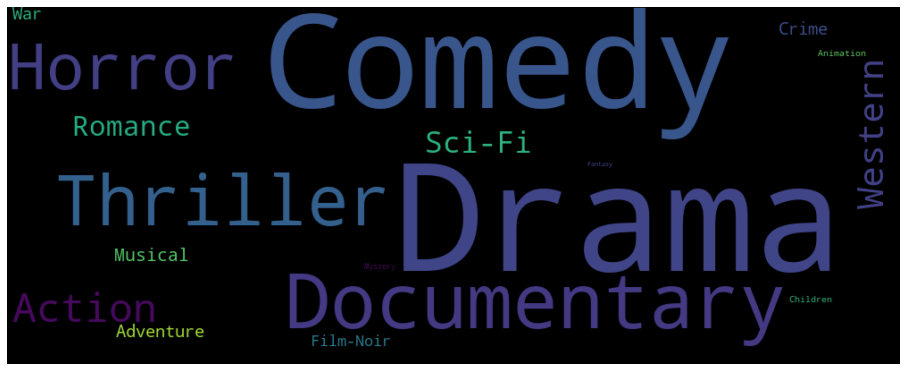

In [81]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]
    
# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()    

In [82]:
### check what are the genres mostly have in high rated movies ( above 2.5 ratings)

In [83]:
keyword_occurences, keyword_count = count_word(df_new[df_new['rating']>=3], 'genres', genre_ids)
keyword_occurences

[['Drama', 59134],
 ['Comedy', 45361],
 ['Documentary', 8941],
 ['Thriller', 6586],
 ['Horror', 4121],
 ['Western', 1244],
 ['Action', 1111],
 ['Romance', 673],
 ['Sci-Fi', 617],
 ['War', 222],
 ['Musical', 219],
 ['Crime', 193],
 ['Adventure', 179],
 ['Film-Noir', 171],
 ['Animation', 24],
 ['Mystery', 23],
 ['Fantasy', 17],
 ['Children', 14],
 ['Short', 2],
 ['IMAX', 0]]

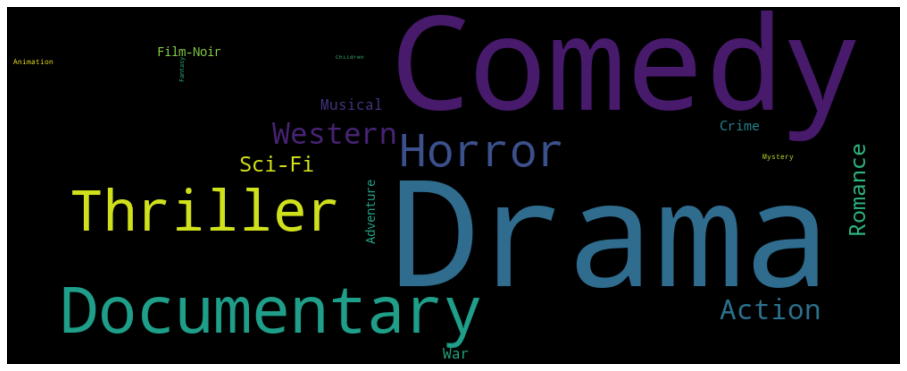

In [84]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]
    
# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()    

In [85]:
# this shows movies with high ratings have Drama,comedy,documentary..... gendres
# so it is advisble to make a movie with a Drama,comedy,documentary,Thriller genres to gain high ratings

### Title Feature

In [86]:
df_title = df_new.copy()
df_title['title'] = df_title['title'].astype('str')

In [87]:
title_corpus = ' '.join(df_title['title'])

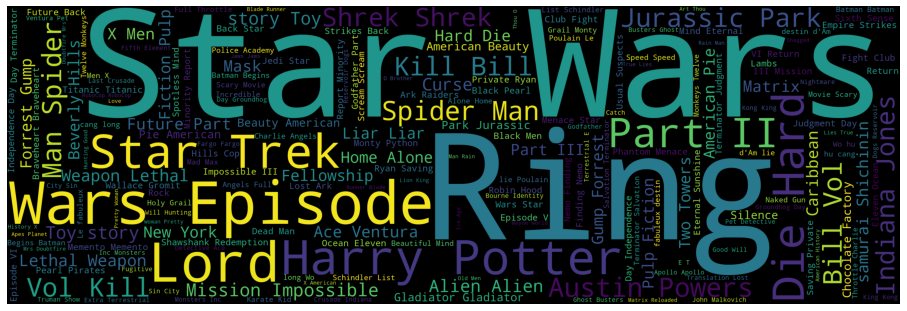

In [88]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=1000, width=3000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [89]:
# we can see Star, Wars, Ring, wars Episode... are the most frequnt title words
# and also we can see part 2 and part 3 has a word size with dicresing order
# people not much love to to next parts in films...

### Year Feature

<AxesSubplot:>

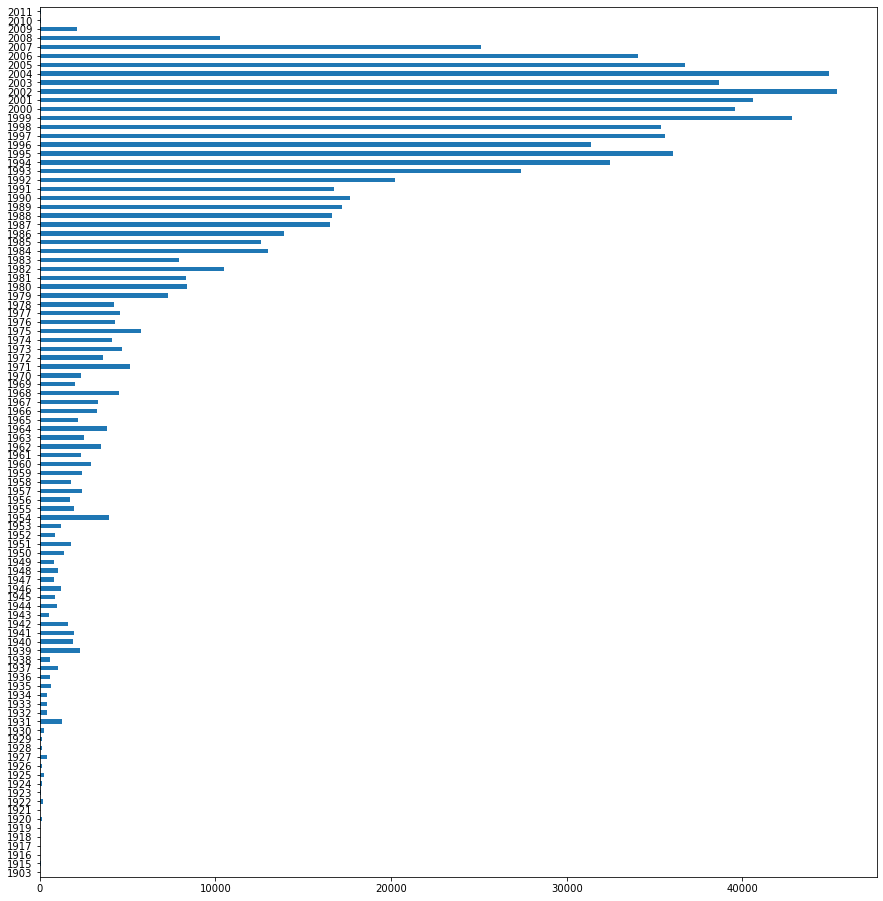

In [90]:
df_new['year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))

In [91]:
# 2008 financial crisis

### Director Feature

#### 1.Total ratings per director

In [92]:
df_dir = df_new.copy()

In [93]:
df_dir.drop_duplicates(subset ="title", keep = 'last', inplace = True)

In [94]:
df_ndirector=pd.DataFrame(df_dir.groupby('directorName')['totalRatingCount'].sum().sort_values(ascending=False)).reset_index()

In [95]:
df_ndirector.head(3)

,directorName,totalRatingCount
0,Steven Spielberg,15529
1,Robert Zemeckis,8375
2,Tim Burton,6697


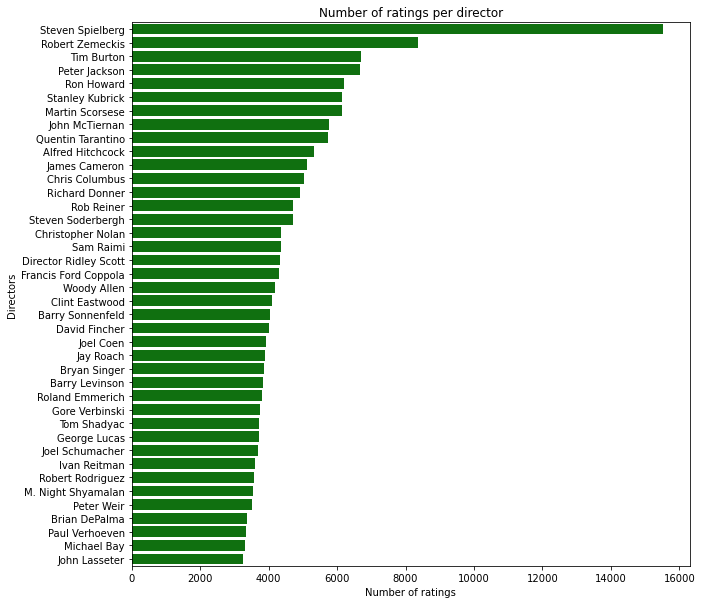

In [96]:
plt.figure(figsize = (10,10))
sns.barplot(data = df_ndirector.head(40), y = 'directorName', x = 'totalRatingCount', color = 'green')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director')
plt.show()

#### 2.Number of movie sper director

In [97]:
df_movie_director=pd.DataFrame(df_dir.groupby('directorName')['title'].count().sort_values(ascending=False)).reset_index()

In [98]:
df_movie_director.head(5)

,directorName,title
0,Alfred Hitchcock,40
1,Unknown,39
2,Woody Allen,36
3,Clint Eastwood,27
4,Akira Kurosawa,25


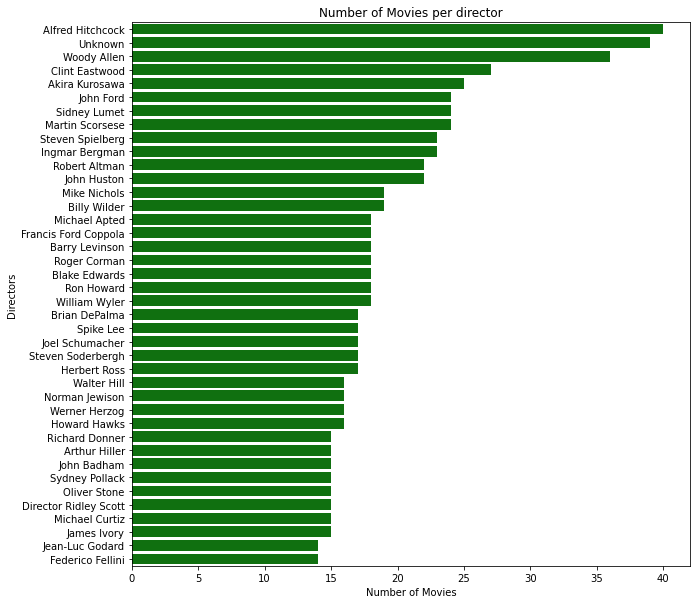

In [99]:
plt.figure(figsize = (10,10))
sns.barplot(data = df_movie_director.head(40), y = 'directorName', x = 'title', color = 'green')
plt.ylabel('Directors')
plt.xlabel('Number of Movies')
plt.title('Number of Movies per director')
plt.show()

In [100]:
# we can see here language is the problem . even Mr.Akira kurasova has most number if films he has not most rating count
# Because he is a japanease and Mr. Steaven Splieberg has most rating counts because he made English movies

#### Correlation


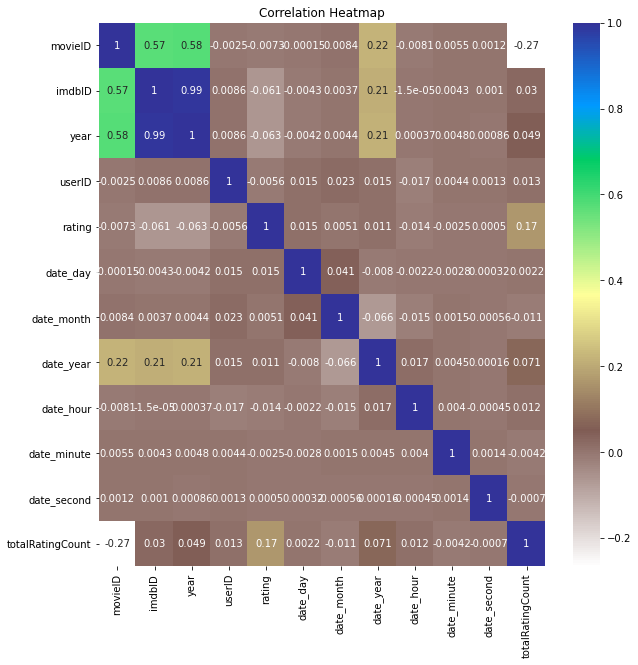

In [101]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df_new.corr(method='spearman'), annot=True, cmap='terrain_r')
heatmap.set_title('Correlation Heatmap')
plt.show()

In [102]:
# we can not see much correlation of important features (even Id, year, imdbId have a big corr those are not much important)

In [103]:
# should choose important features for analysis further

In [104]:
# remove low rating count movies

In [105]:
popularity_threshold = 50
popular_movie=df_new.query('totalRatingCount >= @popularity_threshold')

In [106]:
popular_movie.isnull().sum()

movieID                   0
title                     0
imdbID                    0
spanishTitle              0
imdbPictureURL            0
year                      0
rtID                      0
rtAllCriticsRating        0
rtAllCriticsNumReviews    0
rtAllCriticsNumFresh      0
rtAllCriticsNumRotten     0
rtAllCriticsScore         0
rtTopCriticsRating        0
rtTopCriticsNumReviews    0
rtTopCriticsNumFresh      0
rtTopCriticsNumRotten     0
rtTopCriticsScore         0
rtAudienceRating          0
rtAudienceNumRatings      0
rtAudienceScore           0
rtPictureURL              0
userID                    0
rating                    0
date_day                  0
date_month                0
date_year                 0
date_hour                 0
date_minute               0
date_second               0
genres                    0
directorID                0
directorName              0
actors                    0
country                   0
totalRatingCount          0
dtype: int64

In [107]:
# ML Models
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ML Pre processing
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV

### Collaborative Filtering

In [108]:
chosen_columns = ['userID','movieID','rating']

In [109]:
df_colab = popular_movie[chosen_columns]

In [110]:
df_colab.to_csv('colab_dataSet.csv',index=False)

In [111]:
df_cbr = pd.read_csv('colab_dataSet.csv')

In [112]:
df_cbr.head(2)

,userID,movieID,rating
0,170,1,3.0
1,175,1,4.0


#### Model build

In [113]:
# Loading as Surprise dataframe
df_train = df_cbr.copy()
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(df_train, reader)

In [114]:
# Data split 9/1
trainset, testset = train_test_split(data, test_size=0.1)

In [115]:
# Check the info of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765688 entries, 0 to 765687
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userID   765688 non-null  int64  
 1   movieID  765688 non-null  int64  
 2   rating   765688 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 17.5 MB


In [116]:
# Base algorithm
algo = SVD()

In [117]:
# Fitting our trainset
algo.fit(trainset)

In [118]:
predictions = algo.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [119]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.7523


0.7522983609659761

In [120]:
test.head(3)

,uid,iid,r_ui,est,details
0,71420,6958,3.0,2.617919,{'was_impossible': False}
1,14918,6947,3.5,3.786482,{'was_impossible': False}
2,13701,1278,4.5,4.226292,{'was_impossible': False}


In [121]:
dfs = pd.DataFrame(testset)

In [122]:
dfs = dfs.drop(2,axis=1)

In [123]:
dfs.rename(columns = {0:'userID',1:'movieID'}, inplace = True)

In [124]:
dfs.head(2)

,userID,movieID
0,71420,6958
1,14918,6947


In [125]:
#test_df["rating"] = dfs.apply(lambda x: algo.predict(x["userID"], x["movieID"]).est, axis=1)

In [126]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userID, row.movieID) for _,row in dfs.iterrows()]
ratings_predictions

[Prediction(uid=71420, iid=6958, r_ui=None, est=2.6179194194038433, details={'was_impossible': False}),
 Prediction(uid=14918, iid=6947, r_ui=None, est=3.7864815127521645, details={'was_impossible': False}),
 Prediction(uid=13701, iid=1278, r_ui=None, est=4.2262915370404395, details={'was_impossible': False}),
 Prediction(uid=6625, iid=1265, r_ui=None, est=3.747278931840126, details={'was_impossible': False}),
 Prediction(uid=26242, iid=2167, r_ui=None, est=3.13259677101743, details={'was_impossible': False}),
 Prediction(uid=67189, iid=1961, r_ui=None, est=3.6940583049117466, details={'was_impossible': False}),
 Prediction(uid=25649, iid=551, r_ui=None, est=4.14124586869579, details={'was_impossible': False}),
 Prediction(uid=51603, iid=3408, r_ui=None, est=3.1792477480410573, details={'was_impossible': False}),
 Prediction(uid=34687, iid=6709, r_ui=None, est=2.2283069859460496, details={'was_impossible': False}),
 Prediction(uid=67267, iid=1517, r_ui=None, est=3.594621554264691, deta

In [127]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred.head(2)

,uid,iid,r_ui,est,details
0,71420,6958,None,2.617919,{'was_impossible': False}
1,14918,6947,None,3.786482,{'was_impossible': False}


In [128]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [129]:
df_pred.head(2)

,userId,movieId,rating
0,71420,6958,2.617919
1,14918,6947,3.786482


In [130]:
#ratings_predictions=[algo.predict(row.userID, row.movieID) for _,row in dfs.iterrows()]
predic = algo.predict(4, 44709)

In [131]:
predic

Prediction(uid=4, iid=44709, r_ui=None, est=3.774100616412548, details={'was_impossible': False})

In [132]:
def get_recommendations(uid):
    prediction_list = []
    for mid in df_cbr['movieID'].unique():
        predic = algo.predict(uid,mid)
        prediction_list.append(predic)
    return prediction_list  

In [168]:
prediction = get_recommendations(245)

In [169]:
prediction[:5]

[Prediction(uid=245, iid=1, r_ui=None, est=3.71519484935285, details={'was_impossible': False}),
 Prediction(uid=245, iid=2, r_ui=None, est=3.0393719389515064, details={'was_impossible': False}),
 Prediction(uid=245, iid=3, r_ui=None, est=2.944133472096312, details={'was_impossible': False}),
 Prediction(uid=245, iid=5, r_ui=None, est=2.8705066484535706, details={'was_impossible': False}),
 Prediction(uid=245, iid=6, r_ui=None, est=3.863295368533952, details={'was_impossible': False})]

In [170]:
# Converting our prediction into a familiar format-Dataframe
dfs_pred=pd.DataFrame(prediction)

In [171]:
dfs_pred.drop(columns=['details'],inplace=True)
dfs_pred.head(3)

,uid,iid,r_ui,est
0,245,1,None,3.715195
1,245,2,None,3.039372
2,245,3,None,2.944133


In [172]:
# Renaming our predictions to original names
dfs_pred=dfs_pred.rename(columns={'uid':'userID', 'iid':'movieID','est':'rating'})


In [173]:
dfs_pred = dfs_pred.sort_values('rating',ascending=False)

In [174]:
df_1 = dfs_pred.head(10)

In [175]:
df_1.head(3)

,userID,movieID,r_ui,rating
1162,245,2351,None,4.374156
180,245,318,None,4.307023
2664,245,6669,None,4.304591


In [176]:
df2 = df_1.merge(df_movies ,on='movieID',how='left')

In [177]:
df2.head(3)

,userID,movieID,r_ui,rating,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,245,2351,None,4.374156,Le notti di Cabiria,50783,Las noches de Cabiria,http://ia.media-imdb.com/images/M/MV5BMjExNTA3...,1957,nights_of_cabiria,8.7,35,34,1,97,8.4,11,11,0,100,4.4,3465,94,http://content7.flixster.com/movie/29/88/29880...
1,245,318,None,4.307023,The Shawshank Redemption,111161,Cadena perpetua,http://ia.media-imdb.com/images/M/MV5BMTMwOTMy...,1994,shawshank_redemption,8,57,50,7,87,7.9,11,10,1,90,4.4,168839,98,http://content9.flixster.com/movie/11/12/45/11...
2,245,6669,None,4.304591,Ikiru,44741,Vivir,http://ia.media-imdb.com/images/M/MV5BMTcyMDU0...,1952,ikiru,8.6,30,30,0,100,8.3,9,9,0,100,4.5,5818,96,http://content9.flixster.com/movie/11/14/66/11...


In [178]:
recom_movies_list = df2['title'].values

In [179]:
recom_movies_list

array(['Le notti di Cabiria', 'The Shawshank Redemption', 'Ikiru',
       'The Godfather', 'Kind Hearts and Coronets', 'Festen',
       'Das Leben der Anderen', 'A Man for All Seasons',
       'The Usual Suspects', 'Double Indemnity'], dtype=object)

In [145]:
recom_movies_list

array(['Le notti di Cabiria', 'The Shawshank Redemption', 'Ikiru',
       'The Godfather', 'Kind Hearts and Coronets', 'Festen',
       'Das Leben der Anderen', 'A Man for All Seasons',
       'The Usual Suspects', 'Double Indemnity'], dtype=object)

In [146]:
import pickle
#open a file, where you ant to store the data
file = open('SVD_model.pkl', 'wb')
# dump information to that file
pickle.dump(algo, file)
file.close()

### Content Based Filtering

In [147]:
popular_movie.columns

Index(['movieID', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL', 'userID',
       'rating', 'date_day', 'date_month', 'date_year', 'date_hour',
       'date_minute', 'date_second', 'genres', 'directorID', 'directorName',
       'actors', 'country', 'totalRatingCount'],
      dtype='object')

In [148]:
popular_movie['combined'] = popular_movie['title']+' '+popular_movie['genres']+' '+popular_movie['directorName']+' '+popular_movie['actors']

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
popular_movie.head(2)

,movieID,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,userID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second,genres,directorID,directorName,actors,country,totalRatingCount,combined
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,170,3.0,30,10,2006,12,36,38,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA,1263,Toy story Adventure Animation Children Comedy ...
1,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...,175,4.0,4,12,2005,6,36,46,Adventure Animation Children Comedy Fantasy,john_lasseter,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,USA,1263,Toy story Adventure Animation Children Comedy ...


In [150]:
popular_movie['combined'] = popular_movie['combined'].str.lower()

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
chosen_columns_contentBaed = ['movieID','title','userID','genres','directorName','actors','combined']

In [152]:
df_content_based = popular_movie[chosen_columns_contentBaed]

In [153]:
df_content_based.head(2)

,movieID,title,userID,genres,directorName,actors,combined
0,1,Toy story,170,Adventure Animation Children Comedy Fantasy,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,toy story adventure animation children comedy ...
1,1,Toy story,175,Adventure Animation Children Comedy Fantasy,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,toy story adventure animation children comedy ...


In [154]:
df_content_based.isnull().sum()

movieID         0
title           0
userID          0
genres          0
directorName    0
actors          0
combined        0
dtype: int64

In [155]:
df_content_based.to_csv('content_based_dataSet.csv',index=False)

In [156]:
df_cont = pd.read_csv('content_based_dataSet.csv')

In [157]:
df_cont.isnull().sum()

movieID         0
title           0
userID          0
genres          0
directorName    0
actors          0
combined        0
dtype: int64

In [158]:
df_cont.head(2)

,movieID,title,userID,genres,directorName,actors,combined
0,1,Toy story,170,Adventure Animation Children Comedy Fantasy,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,toy story adventure animation children comedy ...
1,1,Toy story,175,Adventure Animation Children Comedy Fantasy,John Lasseter,Annie Potts Bill Farmer Don Rickles Erik von D...,toy story adventure animation children comedy ...


In [159]:
is_duplicate = df_cont.duplicated()

In [160]:
print("Number of duplicate records:", sum(is_duplicate))

Number of duplicate records: 0


In [161]:
#df_colabBased = df_colabBased.drop_duplicates(subset ="title", keep = 'last')

In [162]:
tv=TfidfVectorizer()
tv_matrix = tv.fit_transform(df_cont['combined'])

In [163]:
df_cont['combined'].shape

(765688,)

In [164]:
#sim_score = cosine_similarity(tv_matrix,tv_matrix)

In [165]:
#from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
#sig = sigmoid_kernel(tv_matrix, tv_matrix)

In [166]:
#df_cont.set_index('title', inplace = True)
#indices = pd.Series(df_cont.index)

In [167]:
# memory errors....